<a href="https://colab.research.google.com/github/zahraniayudyaa/TUGAS-ML/blob/main/ch_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Konsep Dasar ANN dan Sejarah**
---
Artificial Neural Networks (ANNs) terinspirasi dari jaringan saraf biologis otak manusia. Meskipun analogi biologis menjadi titik awal, ANN modern telah berkembang jauh berbeda dari neuron biologis. Perkembangan ANN mengalami beberapa gelombang dengan periode "AI Winter" di mana penelitian ditinggalkan, kemudian bangkit kembali dengan kemajuan komputasi dan data.

Alasan Kebangkitan ANN Modern:
* Big Data: Ketersediaan data dalam jumlah besar
* Komputasi GPU: Kemampuan pemrosesan paralel
* Algoritma Improved: Perbaikan teknik training
* Cloud Computing: Aksesibilitas komputasi awan
* Siklus Virtuous: Funding → Research → Product → More Funding

# **2. Dari Neuron Biologis ke Artificial Neuron**
---
Neuron biologis terdiri dari dendrit, soma, akson, dan sinapsis. McCulloch dan Pitts (1943) membuat model matematis sederhana dari neuron ini. Mereka menunjukkan bahwa jaringan neuron sederhana dapat melakukan operasi logika.
```
# Representasi operasi logika dengan neuron McCulloch-Pitts

# 1. IDENTITY FUNCTION: C = A
#    Neuron C aktif jika menerima 2 sinyal dari A

# 2. AND FUNCTION: C = A ∧ B
#    Neuron C aktif hanya jika menerima sinyal dari A DAN B

# 3. OR FUNCTION: C = A ∨ B  
#    Neuron C aktif jika menerima sinyal dari A ATAU B

# 4. NOT FUNCTION: C = ¬A
#    Dengan koneksi inhibitor, neuron C aktif jika A tidak aktif

# XOR Problem: A ⊕ B = (A ∧ ¬B) ∨ (¬A ∧ B)
# Perceptron tunggal TIDAK bisa menyelesaikan XOR
```



# **3. Perceptron dan Implementasinya**
---
Perceptron ditemukan oleh Frank Rosenblatt (1957) menggunakan Threshold Logic Unit (TLU). Single-layer perceptron dapat melakukan klasifikasi biner linear tetapi memiliki keterbatasan (seperti tidak bisa menyelesaikan XOR).

### **Implementasi Perceptron dengan Scikit-Learn**
Perceptron adalah salah satu arsitektur ANN paling sederhana. Di sini kita menggunakan implementasi Perceptron dari Scikit-Learn untuk klasifikasi biner pada dataset Iris. Kita hanya menggunakan fitur panjang dan lebar petal untuk mengklasifikasikan apakah bunga termasuk spesies Iris setosa atau tidak.

Input: [[2, 0.5]]
Prediksi: [1]
Interpretasi: Iris Setosa
Training accuracy: 100.00%
Weight vector (w): [[-0.14 -0.22]]
Bias term (b): [0.4]

VISUALISASI DECISION BOUNDARY:


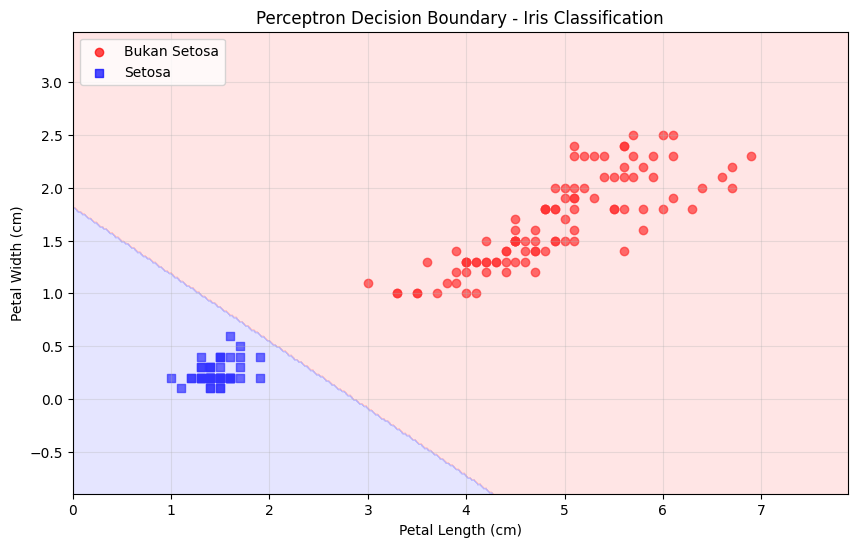

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # menggunakan petal length dan width
y = (iris.target == 0).astype(int)  # klasifikasi biner: Iris setosa atau bukan

# Membuat dan melatih Perceptron
per_clf = Perceptron(random_state=42, max_iter=1000, eta0=0.1)
per_clf.fit(X, y)

# Memprediksi instance baru
test_instance = [[2, 0.5]]
y_pred = per_clf.predict(test_instance)
y_train_pred = per_clf.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)


# Evaluasi pada training data
print(f"Input: {test_instance}")
print(f"Prediksi: {y_pred}")
print(f"Interpretasi: {'Iris Setosa' if y_pred[0] == 1 else 'Bukan Iris Setosa'}")
print(f"Training accuracy: {train_accuracy:.2%}")
print(f"Weight vector (w): {per_clf.coef_}")
print(f"Bias term (b): {per_clf.intercept_}")

# Visualisasi decision boundary
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print("\nVISUALISASI DECISION BOUNDARY:")
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1],
            c='red', marker='o', label='Bukan Setosa', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1],
            c='blue', marker='s', label='Setosa', alpha=0.7)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Perceptron Decision Boundary - Iris Classification')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# **4. Multilayer Perceptron (MLP) dan Backpropagation**
---
MLP mengatasi keterbatasan perceptron tunggal dengan menambahkan hidden layers. Arsitektur dasar MLP:
* Input Layer: Menerima data masukan
* Hidden Layers: Memproses pola kompleks (1+ layer)
* Output Layer: Menghasilkan prediksi

**Backpropagation** (Rumelhart, Hinton, Williams, 1986) adalah algoritma training yang:
* Forward pass: Hitung output
* Hitung error
* Backward pass: Hitung gradient
* Update weights dengan Gradient Descent

**Mengapa Backpropagation Berhasil:**
* Menggunakan activation functions differentiable (sigmoid, tanh, ReLU)
* Random weight initialization untuk memecah simetri
* Chain rule untuk menghitung gradient secara efisien



**Building Image Classifier dengan Sequential API**

IMAGE CLASSIFIER DENGAN SEQUENTIAL API

1. MEMUAT DATASET FASHION MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Pixel value range: [0, 255]
Data type: uint8

2. MEMBUAT VALIDATION SET DAN SCALING...
Training set: 55000 images
Validation set: 5000 images
Test set: 10000 images
Scaled pixel range: [0.00, 1.00]

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

3. CONTOH GAMBAR DARI DATASET:


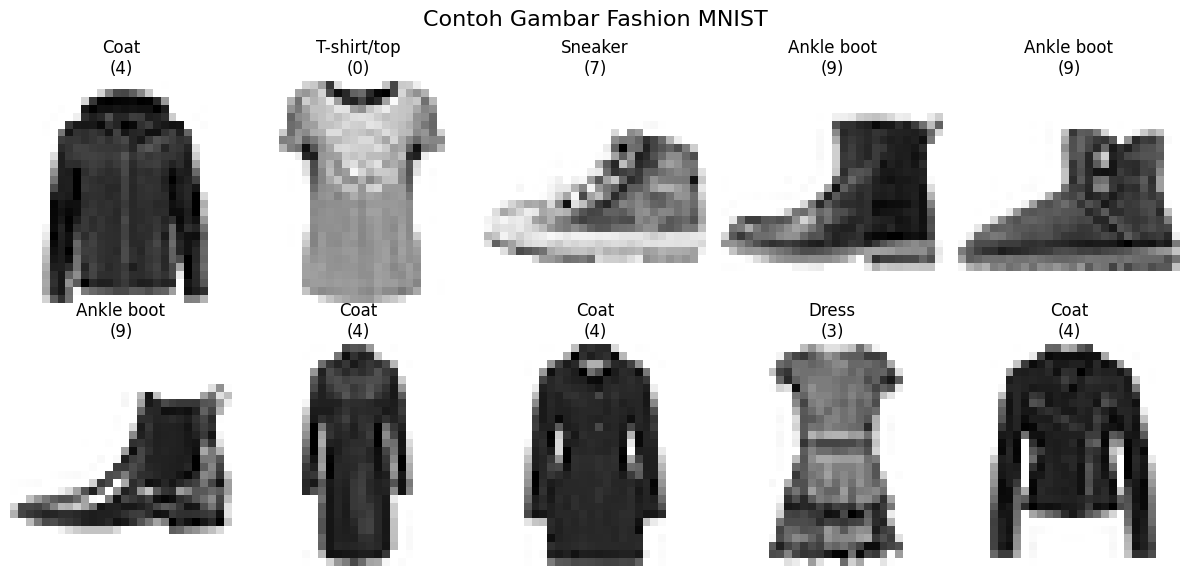


4. MEMBANGUN MODEL SEQUENTIAL...
Model architecture summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)


5. DETAIL LAYERS DAN PARAMETERS:

Layer 0: flatten
  Type: Flatten
  Output shape: (None, 784)

Layer 1: hidden1
  Type: Dense
  Output shape: (None, 300)
  Neurons: 300
  Activation: relu

Layer 2: hidden2
  Type: Dense
  Output shape: (None, 100)
  Neurons: 100
  Activation: relu

Layer 3: output
  Type: Dense
  Output shape: (None, 10)
  Neurons: 10
  Activation: softmax

6. COMPILE MODEL...
Optimizer: SGD dengan learning_rate=0.01
Loss function: sparse_categorical_crossentropy
Metrics: ['accuracy']

7. TRAINING MODEL (5 EPOCH UNTUK DEMO)...
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6939 - loss: 0.9818 - val_accuracy: 0.8294 - val_loss: 0.5029
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8254 - loss: 0.4995 - val_accuracy: 0.8534 - val_loss: 0.4425
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8409 - loss: 0.4525 - val_accuracy: 0.8582 - val_loss: 0.4108
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accur

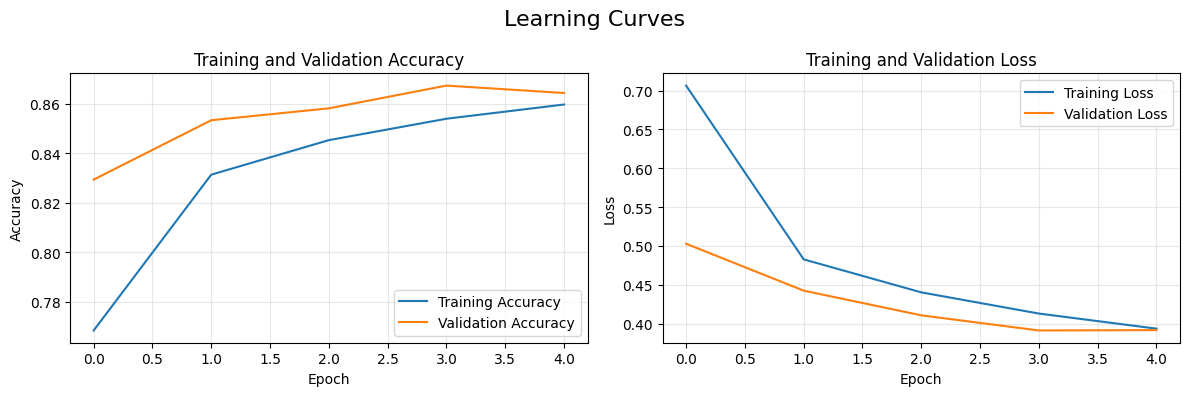

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print("=" * 60)
print("IMAGE CLASSIFIER DENGAN SEQUENTIAL API")
print("=" * 60)

# Memuat dataset Fashion MNIST
print("\n1. MEMUAT DATASET FASHION MNIST...")
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train_full shape: {X_train_full.shape}")
print(f"y_train_full shape: {y_train_full.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Pixel value range: [{X_train_full.min()}, {X_train_full.max()}]")
print(f"Data type: {X_train_full.dtype}")

# Membuat validation set dan scaling
print("\n2. MEMBUAT VALIDATION SET DAN SCALING...")
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_valid.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Scaled pixel range: [{X_train.min():.2f}, {X_train.max():.2f}]")

# Nama kelas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"\nClass names: {class_names}")

# Menampilkan contoh gambar
print("\n3. CONTOH GAMBAR DARI DATASET:")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.title(f"{class_names[y_train[i]]}\n({y_train[i]})")
plt.suptitle("Contoh Gambar Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

# Membangun model
print("\n4. MEMBANGUN MODEL SEQUENTIAL...")
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", name="hidden1"),
    keras.layers.Dense(100, activation="relu", name="hidden2"),
    keras.layers.Dense(10, activation="softmax", name="output")
])

print("Model architecture summary:")
model.summary()

# Menampilkan detail layers
print("\n5. DETAIL LAYERS DAN PARAMETERS:")
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i}: {layer.name}")
    print(f"  Type: {type(layer).__name__}")
    # Use layer.output.shape for more robust access to output shape
    if hasattr(layer, 'output') and layer.output is not None:
        print(f"  Output shape: {layer.output.shape}")
    else:
        print(f"  Output shape: Not available")

    if hasattr(layer, 'units'):
        print(f"  Neurons: {layer.units}")
    if hasattr(layer, 'activation'):
        print(f"  Activation: {layer.activation.__name__ if callable(layer.activation) else layer.activation}")

# Compile model
print("\n6. COMPILE MODEL...")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

print("Optimizer: SGD dengan learning_rate=0.01")
print("Loss function: sparse_categorical_crossentropy")
print("Metrics: ['accuracy']")

# Training model (hanya 5 epoch untuk demo)
print("\n7. TRAINING MODEL (5 EPOCH UNTUK DEMO)...")
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

# Menampilkan training history
print("\n8. TRAINING HISTORY:")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Learning Curves', fontsize=16)
plt.tight_layout()
plt.show()

# **5. Activation Functions**
---
Activation function menentukan output neuron berdasarkan weighted sum. Beberapa fungsi populer:

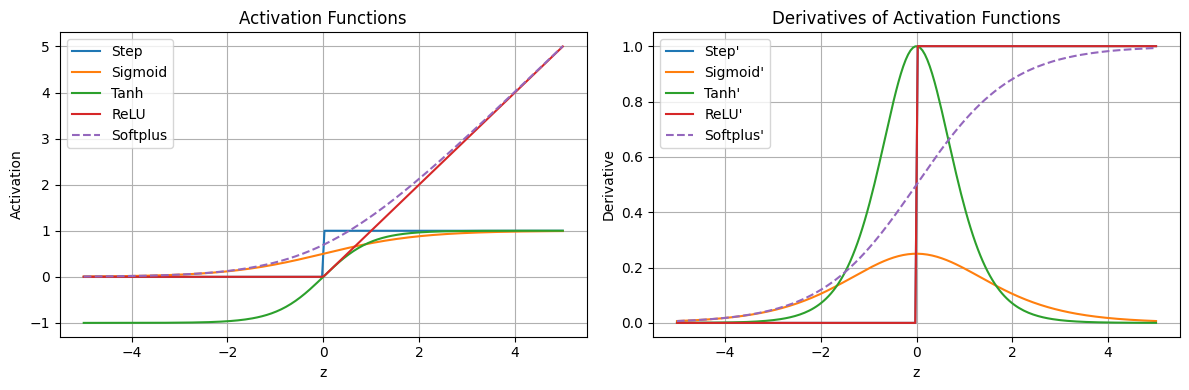

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi berbagai activation functions
def step_function(z):
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def softplus(z):
    return np.log(1 + np.exp(z))

# Plot activation functions
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(z, step_function(z), label="Step")
plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, tanh(z), label="Tanh")
plt.plot(z, relu(z), label="ReLU")
plt.plot(z, softplus(z), label="Softplus", linestyle="--")
plt.title("Activation Functions")
plt.xlabel("z")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)

# Plot derivatives
plt.subplot(1, 2, 2)
plt.plot(z, np.where(z >= 0, 1, 0), label="Step'")
plt.plot(z, sigmoid(z) * (1 - sigmoid(z)), label="Sigmoid'")
plt.plot(z, 1 - tanh(z)**2, label="Tanh'")
plt.plot(z, np.where(z >= 0, 1, 0), label="ReLU'")
plt.plot(z, sigmoid(z), label="Softplus'", linestyle="--")
plt.title("Derivatives of Activation Functions")
plt.xlabel("z")
plt.ylabel("Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Karakteristik masing-masing:**
* Step: Tidak differentiable, hanya untuk perceptron klasik
* Sigmoid: Output (0,1), mengalami vanishing gradient
* Tanh: Output (-1,1), lebih baik untuk centered data
* ReLU: Paling populer, cepat, tidak saturasi untuk z>0
* Softplus: Smooth version of ReLU

# **6. Regression MLPs - Arsitektur dan Loss Functions**
---
Untuk regression tasks, arsitektur MLP berbeda dari classification:

In [4]:
from tensorflow import keras

# Arsitektur MLP untuk regression
def create_regression_mlp(input_shape, n_hidden=2, n_neurons=50):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=input_shape))

    # Hidden layers dengan ReLU
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer: 1 neuron, tanpa activation untuk regression
    model.add(keras.layers.Dense(1))

    # Compile dengan MSE loss
    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.SGD(learning_rate=0.01),
        metrics=["mse"]  # Mean Squared Error sebagai metric
    )

    return model

# Contoh penggunaan untuk California Housing dataset
# (Data loading seperti sebelumnya)
# model = create_regression_mlp(input_shape=X_train.shape[1:])
# history = model.fit(X_train, y_train, epochs=100, ...)

### **Loss Functions untuk Regression:**
* MSE (Mean Squared Error): Standard, sensitif terhadap outliers
```
# MSE = 1/m Σ(y_pred - y_true)²
```
* MAE (Mean Absolute Error): Lebih robust terhadap outliers
```
# MAE = 1/m Σ|y_pred - y_true|
```
* Huber Loss: Kombinasi MSE dan MAE
```
# Huber = { 0.5*(y_pred-y_true)² jika |error| ≤ δ
#         { δ*(|error| - 0.5*δ)   jika |error| > δ
```




### **Regression MLP untuk California Housing**

Memuat dataset:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras

print("=" * 60)
print("REGRESSION MLP UNTUK CALIFORNIA HOUSING")
print("=" * 60)

# Memuat dataset
print("\n1. MEMUAT DAN ANALYZING DATASET...")
housing = fetch_california_housing()

print(f"Dataset shape: {housing.data.shape}")
print(f"Number of features: {housing.data.shape[1]}")
print(f"Feature names: {housing.feature_names}")
print(f"Target name: {housing.target_names[0]}")

# Buat DataFrame untuk analisis
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print("\n2. STATISTIK DESKRIPTIF:")
print(df.describe().round(2))

# Split data
print("\n3. SPLITTING DATA...")
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_valid.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scaling
print("\n4. STANDARD SCALING...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print("Scaling statistics:")
print(f"  Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"  Std after scaling: {X_train_scaled.std():.6f}")



REGRESSION MLP UNTUK CALIFORNIA HOUSING

1. MEMUAT DAN ANALYZING DATASET...
Dataset shape: (20640, 8)
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: MedHouseVal

2. STATISTIK DESKRIPTIF:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  
count  20640.00   20

Membangun model regression:

In [6]:
# Membangun model regression
print("\n5. MEMBANGUN REGRESSION MLP...")
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)  # Output layer tanpa activation function
])

print("Model architecture:")
model.summary()

# Compile model
print("\n6. COMPILE MODEL...")
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]  # Mean Absolute Error
)

print("Optimizer: Adam dengan learning_rate=0.001")
print("Loss function: mean_squared_error (MSE)")
print("Metrics: ['mae']")

# Training
print("\n7. TRAINING MODEL (10 EPOCH UNTUK DEMO)...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    validation_data=(X_valid_scaled, y_valid),
    batch_size=32,
    verbose=1
)


5. MEMBANGUN REGRESSION MLP...
Model architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621 (10.24 KB)

 Trainable params: 2,621 (10.24 KB)

 Non-trainable params: 0 (0.00 B)


6. COMPILE MODEL...
Optimizer: Adam dengan learning_rate=0.001
Loss function: mean_squared_error (MSE)
Metrics: ['mae']

7. TRAINING MODEL (10 EPOCH UNTUK DEMO)...
Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9978 - mae: 0.8518 - val_loss: 0.7980 - val_mae: 0.4945
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4268 - mae: 0.4556 - val_loss: 0.3874 - val_mae: 0.4504
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3677 - mae: 0.4277 - val_loss: 0.4144 - val_mae: 0.4569
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3546 - mae: 0.4165 - val_loss: 0.4216 - val_mae: 0.4242
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3332 - mae: 0.4034 - val_loss: 0.4587 - val_mae: 0.4158
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3172 - mae: 0.3928 - val_loss: 0.3392 - val_mae: 0.4011
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3290 - mae: 0.3941 - val_loss: 0.3329 - val_mae: 0.4048
Epoch 8/1

Evaluasi:

In [7]:
# Evaluate on test set
print("\n8. EVALUASI PADA TEST SET...")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled).flatten()

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")
print(f"Model MAE: {test_mae:.4f}")


8. EVALUASI PADA TEST SET...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 0.3017
Test RMSE: 0.5493
Test MAE: 0.3751
Test R² Score: 0.7697
Model MAE: 0.3751


Hasil Prediksi:

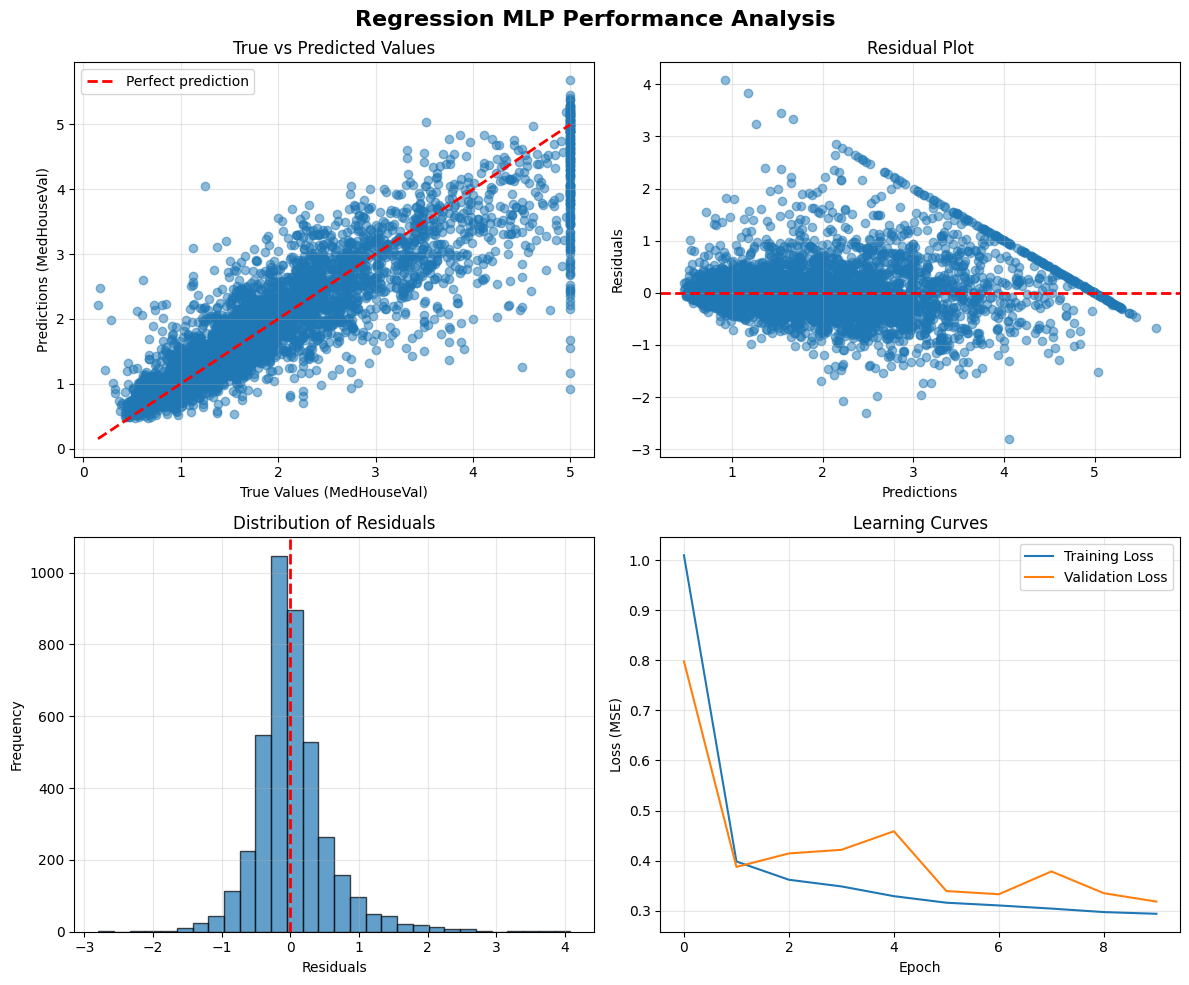


9. PREDIKSI UNTUK SAMPLE BARU:

Sample 0:
  True value: $47,700
  Predicted: $69,383
  Error: $21,683 (45.5%)

Sample 10:
  True value: $123,200
  Predicted: $99,072
  Error: $24,128 (19.6%)

Sample 20:
  True value: $425,000
  Predicted: $446,310
  Error: $21,310 (5.0%)


In [8]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. True vs Predicted values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect prediction')
axes[0, 0].set_xlabel('True Values (MedHouseVal)')
axes[0, 0].set_ylabel('Predictions (MedHouseVal)')
axes[0, 0].set_title('True vs Predicted Values')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predictions')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Error distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Learning curves
axes[1, 1].plot(history.history['loss'], label='Training Loss')
axes[1, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss (MSE)')
axes[1, 1].set_title('Learning Curves')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Regression MLP Performance Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Predict on new samples
print("\n9. PREDIKSI UNTUK SAMPLE BARU:")
sample_indices = [0, 10, 20]
for idx in sample_indices:
    true_val = y_test[idx]
    pred_val = y_pred[idx]
    error = abs(true_val - pred_val)

    print(f"\nSample {idx}:")
    print(f"  True value: ${true_val*100000:,.0f}")
    print(f"  Predicted: ${pred_val*100000:,.0f}")
    print(f"  Error: ${error*100000:,.0f} ({error/true_val*100:.1f}%)")

#**7. Functional API untuk Wide & Deep Network**
---

### **Wide & Deep Neural Network**
Wide & Deep Network menghubungkan input langsung ke output layer (wide path) sekaligus melalui hidden layers (deep path). Ini memungkinkan model mempelajari pola sederhana dan kompleks secara bersamaan.

In [9]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

### **Multiple Inputs**
Untuk kasus dimana subset fitur berbeda diproses melalui path yang berbeda. Contoh: 5 fitur pertama melalui wide path, 6 fitur (dimulai dari fitur ke-2) melalui deep path.

In [10]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

### **Melatih model dengan multiple inputs**
Ketika model memiliki multiple inputs, data training harus diberikan sebagai tuple atau dictionary.

In [11]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A = X_train_scaled[:, :5]
X_train_B = X_train_scaled[:, 2:]
X_valid_A = X_valid_scaled[:, :5]
X_valid_B = X_valid_scaled[:, 2:]
X_test_A = X_test_scaled[:, :5]
X_test_B = X_test_scaled[:, 2:]
X_new_A = X_test_A[:3]
X_new_B = X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

print(f"MSE: {mse_test:.4f}")

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0882 - val_loss: 1.3139
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8647 - val_loss: 0.7623
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7010 - val_loss: 0.6934
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6506 - val_loss: 0.6544
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6256 - val_loss: 0.6250
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5899 - val_loss: 0.6025
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5629 - val_loss: 0.5827
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5496 - val_loss: 0.5695
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5299 - val_loss: 0.5543
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5282 - val_loss: 0.5489
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5187 - val_loss: 0.5336
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

# **8. Multiple Outputs dengan Auxiliary Output**
Multiple outputs berguna untuk:
* Multi-task learning (misal: prediksi lokasi dan klasifikasi objek)
* Regularization dengan auxiliary output
* Kasus dimana satu instance memiliki multiple label

In [12]:
# Menambahkan auxiliary output dari hidden layer kedua
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B],
                    outputs=[output, aux_output])

# Compile dengan multiple loss functions dan weights
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],  # Main output lebih penting
              optimizer="sgd")

# Training dengan multiple outputs (label sama untuk kedua output)
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# Evaluasi mengembalikan total loss dan individual losses
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

# Prediksi mengembalikan output untuk setiap output layer
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 3.0249 - loss: 1.1802 - main_output_loss: 0.9752 - val_aux_output_loss: 1.4502 - val_loss: 2.7018 - val_main_output_loss: 2.8221
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.0021 - loss: 0.9529 - main_output_loss: 0.9474 - val_aux_output_loss: 0.8606 - val_loss: 0.5111 - val_main_output_loss: 0.4712
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.7717 - loss: 0.4720 - main_output_loss: 0.4387 - val_aux_output_loss: 0.7615 - val_loss: 0.4751 - val_main_output_loss: 0.4427
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.6852 - loss: 0.4494 - main_output_loss: 0.4232 - val_aux_output_loss: 0.7060 - val_loss: 0.4613 - val_main_output_loss: 0.4337
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.6394 - loss: 0.4265 - main_output_loss: 0.4029 - val_aux_output_loss: 0.6751 - val_loss: 0.4472 - val_main_output_loss: 0.4218


# **9. Subclassing API**
Subclassing API memberikan fleksibilitas maksimal dengan mendefinisikan model sebagai class Python. Cocok untuk arsitektur dinamis dengan loops, conditional branching, atau operasi TensorFlow tingkat rendah.

In [13]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        # Mendefinisikan layers di constructor
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        # Forward pass logic
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# Membuat instance model
model = WideAndDeepModel()

### **Menyimpan dan Memuat Model**
Keras menyimpan model dalam format HDF5 (.h5) yang berisi arsitektur, weights, dan optimizer state.

In [14]:
# Menyimpan model
model.save("my_keras_model.h5")

# Memuat model, menyediakan kelas kustom
model = keras.models.load_model("my_keras_model.h5", custom_objects={"WideAndDeepModel": WideAndDeepModel})

# **10. Callbacks**
### **ModelCheckpoint Callback**
Menyimpan checkpoint model secara berkala selama training

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

# Recompile the model after loading, using the same configuration as the original multiple-output model
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],
              optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    callbacks=[checkpoint_cb],
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/10
381/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4172 - mse_loss: 2.6019

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3721 - mse_loss: 2.5360 - val_loss: 0.6655 - val_mse_loss: 1.2928
Epoch 2/10
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5349 - mse_loss: 1.0561

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5340 - mse_loss: 1.0526 - val_loss: 0.5101 - val_mse_loss: 0.9574
Epoch 3/10
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4692 - mse_loss: 0.8034

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4693 - mse_loss: 0.8033 - val_loss: 0.4800 - val_mse_loss: 0.7937
Epoch 4/10
380/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4442 - mse_loss: 0.7158

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4444 - mse_loss: 0.7139 - val_loss: 0.4716 - val_mse_loss: 0.7097
Epoch 5/10
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4217 - mse_loss: 0.6259

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4220 - mse_loss: 0.6260 - val_loss: 0.4441 - val_mse_loss: 0.6553
Epoch 6/10
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4309 - mse_loss: 0.6121

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4299 - mse_loss: 0.6107 - val_loss: 0.4523 - val_mse_loss: 0.6318
Epoch 7/10
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4038 - mse_loss: 0.5636

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4039 - mse_loss: 0.5637 - val_loss: 0.4377 - val_mse_loss: 0.6102
Epoch 8/10
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4132 - mse_loss: 0.5695

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4129 - mse_loss: 0.5690 - val_loss: 0.4228 - val_mse_loss: 0.5940
Epoch 9/10
404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4003 - mse_loss: 0.5522

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4003 - mse_loss: 0.5519 - val_loss: 0.4297 - val_mse_loss: 0.5804
Epoch 10/10
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3992 - mse_loss: 0.5323

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3991 - mse_loss: 0.5322 - val_loss: 0.4094 - val_mse_loss: 0.5754


### **Early Stopping**
Menghentikan training ketika validation performance tidak membaik setelah beberapa epoch.

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,  # Tunggu 10 epoch tanpa improvement
    restore_best_weights=True  # Kembali ke weights terbaik
)

# Menggabungkan checkpoint dan early stopping
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
383/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3982 - mse_loss: 0.5201

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3972 - mse_loss: 0.5198 - val_loss: 0.4298 - val_mse_loss: 0.5610
Epoch 2/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3790 - mse_loss: 0.5159

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3791 - mse_loss: 0.5155 - val_loss: 0.4027 - val_mse_loss: 0.5517
Epoch 3/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3714 - mse_loss: 0.4973

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3718 - mse_loss: 0.4975 - val_loss: 0.4086 - val_mse_loss: 0.5492
Epoch 4/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3864 - mse_loss: 0.5060

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3859 - mse_loss: 0.5055 - val_loss: 0.4173 - val_mse_loss: 0.5400
Epoch 5/100
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3760 - mse_loss: 0.4993

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3759 - mse_loss: 0.4987 - val_loss: 0.4186 - val_mse_loss: 0.5339
Epoch 6/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3853 - mse_loss: 0.4918

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3847 - mse_loss: 0.4915 - val_loss: 0.3920 - val_mse_loss: 0.5216
Epoch 7/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3627 - mse_loss: 0.4747

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3627 - mse_loss: 0.4747 - val_loss: 0.3949 - val_mse_loss: 0.5198
Epoch 8/100
389/413 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3499 - mse_loss: 0.4540

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3505 - mse_loss: 0.4549 - val_loss: 0.3890 - val_mse_loss: 0.5104
Epoch 9/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3638 - mse_loss: 0.4756

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3638 - mse_loss: 0.4755 - val_loss: 0.3891 - val_mse_loss: 0.5023
Epoch 10/100
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3714 - mse_loss: 0.4714

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3711 - mse_loss: 0.4712 - val_loss: 0.3740 - val_mse_loss: 0.4947
Epoch 11/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3706 - mse_loss: 0.4694

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - mse_loss: 0.4688 - val_loss: 0.3757 - val_mse_loss: 0.4897
Epoch 12/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3547 - mse_loss: 0.4630

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3545 - mse_loss: 0.4625 - val_loss: 0.3771 - val_mse_loss: 0.4891
Epoch 13/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3647 - mse_loss: 0.4591

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3638 - mse_loss: 0.4585 - val_loss: 0.3873 - val_mse_loss: 0.4943
Epoch 14/100
382/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3524 - mse_loss: 0.4529

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3521 - mse_loss: 0.4522 - val_loss: 0.3704 - val_mse_loss: 0.4807
Epoch 15/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3545 - mse_loss: 0.4517

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3545 - mse_loss: 0.4516 - val_loss: 0.3651 - val_mse_loss: 0.4853
Epoch 16/100
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3544 - mse_loss: 0.4481

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3538 - mse_loss: 0.4476 - val_loss: 0.3559 - val_mse_loss: 0.4736
Epoch 17/100
381/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3403 - mse_loss: 0.4259

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3407 - mse_loss: 0.4270 - val_loss: 0.3731 - val_mse_loss: 0.4777
Epoch 18/100
397/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3344 - mse_loss: 0.4256

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3348 - mse_loss: 0.4260 - val_loss: 0.4029 - val_mse_loss: 0.4866
Epoch 19/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3358 - mse_loss: 0.4211

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3359 - mse_loss: 0.4212 - val_loss: 0.3512 - val_mse_loss: 0.4621
Epoch 20/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3377 - mse_loss: 0.4268

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3380 - mse_loss: 0.4272 - val_loss: 0.3662 - val_mse_loss: 0.4639
Epoch 21/100
381/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3584 - mse_loss: 0.4444

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3569 - mse_loss: 0.4432 - val_loss: 0.4004 - val_mse_loss: 0.4716
Epoch 22/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3334 - mse_loss: 0.4255

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3335 - mse_loss: 0.4255 - val_loss: 0.3536 - val_mse_loss: 0.4559
Epoch 23/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3369 - mse_loss: 0.4214

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3369 - mse_loss: 0.4215 - val_loss: 0.3949 - val_mse_loss: 0.4541
Epoch 24/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3399 - mse_loss: 0.4246

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3399 - mse_loss: 0.4246 - val_loss: 0.3513 - val_mse_loss: 0.4541
Epoch 25/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3414 - mse_loss: 0.4221

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3414 - mse_loss: 0.4221 - val_loss: 0.3605 - val_mse_loss: 0.4517
Epoch 26/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3391 - mse_loss: 0.4308

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3389 - mse_loss: 0.4302 - val_loss: 0.3556 - val_mse_loss: 0.4484
Epoch 27/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3296 - mse_loss: 0.4170

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3300 - mse_loss: 0.4172 - val_loss: 0.3585 - val_mse_loss: 0.4537
Epoch 28/100
393/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3281 - mse_loss: 0.4152

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3285 - mse_loss: 0.4153 - val_loss: 0.3846 - val_mse_loss: 0.4666
Epoch 29/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3418 - mse_loss: 0.4316

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3415 - mse_loss: 0.4312 - val_loss: 0.3491 - val_mse_loss: 0.4442
Epoch 30/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3229 - mse_loss: 0.4103

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3229 - mse_loss: 0.4103 - val_loss: 0.3648 - val_mse_loss: 0.4522
Epoch 31/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3457 - mse_loss: 0.4280

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3456 - mse_loss: 0.4279 - val_loss: 0.3455 - val_mse_loss: 0.4442
Epoch 32/100
383/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3492 - mse_loss: 0.4288

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3480 - mse_loss: 0.4276 - val_loss: 0.3437 - val_mse_loss: 0.4398
Epoch 33/100
393/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3276 - mse_loss: 0.4094

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3278 - mse_loss: 0.4095 - val_loss: 0.3552 - val_mse_loss: 0.4404
Epoch 34/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3338 - mse_loss: 0.4139

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3338 - mse_loss: 0.4139 - val_loss: 0.3505 - val_mse_loss: 0.4401
Epoch 35/100
385/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3429 - mse_loss: 0.4299

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3420 - mse_loss: 0.4287 - val_loss: 0.3670 - val_mse_loss: 0.4490
Epoch 36/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3250 - mse_loss: 0.4023

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3250 - mse_loss: 0.4023 - val_loss: 0.3485 - val_mse_loss: 0.4382
Epoch 37/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3162 - mse_loss: 0.3974

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3168 - mse_loss: 0.3980 - val_loss: 0.3403 - val_mse_loss: 0.4361
Epoch 38/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3187 - mse_loss: 0.3942

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3188 - mse_loss: 0.3943 - val_loss: 0.3436 - val_mse_loss: 0.4356
Epoch 39/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3409 - mse_loss: 0.4207

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3399 - mse_loss: 0.4197 - val_loss: 0.3501 - val_mse_loss: 0.4353
Epoch 40/100
395/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3305 - mse_loss: 0.4108

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3304 - mse_loss: 0.4107 - val_loss: 0.3347 - val_mse_loss: 0.4282
Epoch 41/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3323 - mse_loss: 0.4094

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3322 - mse_loss: 0.4093 - val_loss: 0.3745 - val_mse_loss: 0.4440
Epoch 42/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3251 - mse_loss: 0.4103

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3252 - mse_loss: 0.4102 - val_loss: 0.3541 - val_mse_loss: 0.4310
Epoch 43/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3369 - mse_loss: 0.4164

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3367 - mse_loss: 0.4161 - val_loss: 0.3457 - val_mse_loss: 0.4260
Epoch 44/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3333 - mse_loss: 0.4027

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3329 - mse_loss: 0.4026 - val_loss: 0.3395 - val_mse_loss: 0.4282
Epoch 45/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3269 - mse_loss: 0.4027

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3268 - mse_loss: 0.4026 - val_loss: 0.3491 - val_mse_loss: 0.4356
Epoch 46/100
383/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3245 - mse_loss: 0.3999

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3245 - mse_loss: 0.4000 - val_loss: 0.3469 - val_mse_loss: 0.4299
Epoch 47/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3237 - mse_loss: 0.4025

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3237 - mse_loss: 0.4024 - val_loss: 0.3376 - val_mse_loss: 0.4222
Epoch 48/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3172 - mse_loss: 0.3903

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3173 - mse_loss: 0.3904 - val_loss: 0.3331 - val_mse_loss: 0.4219
Epoch 49/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3063 - mse_loss: 0.3818

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3066 - mse_loss: 0.3821 - val_loss: 0.3506 - val_mse_loss: 0.4332
Epoch 50/100
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3105 - mse_loss: 0.3819

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3112 - mse_loss: 0.3829 - val_loss: 0.3306 - val_mse_loss: 0.4170
Epoch 51/100
404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3177 - mse_loss: 0.3936

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3178 - mse_loss: 0.3936 - val_loss: 0.3322 - val_mse_loss: 0.4168
Epoch 52/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3245 - mse_loss: 0.3991

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3244 - mse_loss: 0.3990 - val_loss: 0.3531 - val_mse_loss: 0.4302
Epoch 53/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3212 - mse_loss: 0.3944

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3212 - mse_loss: 0.3944 - val_loss: 0.3316 - val_mse_loss: 0.4142
Epoch 54/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3078 - mse_loss: 0.3801

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3082 - mse_loss: 0.3805 - val_loss: 0.3737 - val_mse_loss: 0.4297
Epoch 55/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3175 - mse_loss: 0.3916

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3175 - mse_loss: 0.3916 - val_loss: 0.3279 - val_mse_loss: 0.4094
Epoch 56/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3234 - mse_loss: 0.3914

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3231 - mse_loss: 0.3914 - val_loss: 0.3618 - val_mse_loss: 0.4304
Epoch 57/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3238 - mse_loss: 0.3939

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3237 - mse_loss: 0.3939 - val_loss: 0.3339 - val_mse_loss: 0.4110
Epoch 58/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3134 - mse_loss: 0.3801

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3134 - mse_loss: 0.3802 - val_loss: 0.3437 - val_mse_loss: 0.4230
Epoch 59/100
385/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3104 - mse_loss: 0.3839

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3108 - mse_loss: 0.3841 - val_loss: 0.3684 - val_mse_loss: 0.4299
Epoch 60/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3127 - mse_loss: 0.3787

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3131 - mse_loss: 0.3794 - val_loss: 0.3598 - val_mse_loss: 0.4206
Epoch 61/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3137 - mse_loss: 0.3887

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3137 - mse_loss: 0.3885 - val_loss: 0.3574 - val_mse_loss: 0.4347
Epoch 62/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3257 - mse_loss: 0.4013

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3254 - mse_loss: 0.4009 - val_loss: 0.3478 - val_mse_loss: 0.4234
Epoch 63/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3251 - mse_loss: 0.3935

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3251 - mse_loss: 0.3934 - val_loss: 0.3350 - val_mse_loss: 0.4142
Epoch 64/100
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3259 - mse_loss: 0.3949

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3257 - mse_loss: 0.3947 - val_loss: 0.3405 - val_mse_loss: 0.4100
Epoch 65/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3126 - mse_loss: 0.3795

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3126 - mse_loss: 0.3795 - val_loss: 0.3277 - val_mse_loss: 0.4057
Epoch 66/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3083 - mse_loss: 0.3706

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3085 - mse_loss: 0.3710 - val_loss: 0.3539 - val_mse_loss: 0.4158
Epoch 67/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3152 - mse_loss: 0.3910

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3152 - mse_loss: 0.3909 - val_loss: 0.3364 - val_mse_loss: 0.4097
Epoch 68/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3150 - mse_loss: 0.3816

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3149 - mse_loss: 0.3815 - val_loss: 0.3309 - val_mse_loss: 0.4041
Epoch 69/100
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3158 - mse_loss: 0.3877

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3155 - mse_loss: 0.3872 - val_loss: 0.3358 - val_mse_loss: 0.4039
Epoch 70/100
397/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3150 - mse_loss: 0.3810

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3150 - mse_loss: 0.3810 - val_loss: 0.3301 - val_mse_loss: 0.4058
Epoch 71/100
385/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3081 - mse_loss: 0.3750

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3085 - mse_loss: 0.3754 - val_loss: 0.3356 - val_mse_loss: 0.4093
Epoch 72/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3044 - mse_loss: 0.3693

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3047 - mse_loss: 0.3699 - val_loss: 0.3241 - val_mse_loss: 0.3996
Epoch 73/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3117 - mse_loss: 0.3775

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3117 - mse_loss: 0.3775 - val_loss: 0.3228 - val_mse_loss: 0.3957
Epoch 74/100
394/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3109 - mse_loss: 0.3730

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3109 - mse_loss: 0.3732 - val_loss: 0.3204 - val_mse_loss: 0.3954
Epoch 75/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3043 - mse_loss: 0.3762

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3043 - mse_loss: 0.3762 - val_loss: 0.3296 - val_mse_loss: 0.3995
Epoch 76/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2980 - mse_loss: 0.3628

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2984 - mse_loss: 0.3632 - val_loss: 0.3454 - val_mse_loss: 0.4093
Epoch 77/100
392/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3143 - mse_loss: 0.3804

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3142 - mse_loss: 0.3802 - val_loss: 0.3703 - val_mse_loss: 0.4342
Epoch 78/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3131 - mse_loss: 0.3863

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3130 - mse_loss: 0.3862 - val_loss: 0.3270 - val_mse_loss: 0.4021
Epoch 79/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3021 - mse_loss: 0.3727

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3022 - mse_loss: 0.3727 - val_loss: 0.3232 - val_mse_loss: 0.3962
Epoch 80/100
393/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3049 - mse_loss: 0.3761

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3052 - mse_loss: 0.3760 - val_loss: 0.3862 - val_mse_loss: 0.4161
Epoch 81/100
404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2989 - mse_loss: 0.3657

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2991 - mse_loss: 0.3659 - val_loss: 0.3186 - val_mse_loss: 0.3943
Epoch 82/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3044 - mse_loss: 0.3736

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3045 - mse_loss: 0.3736 - val_loss: 0.3445 - val_mse_loss: 0.4057
Epoch 83/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3217 - mse_loss: 0.3829

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3212 - mse_loss: 0.3825 - val_loss: 0.3355 - val_mse_loss: 0.3976
Epoch 84/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3251 - mse_loss: 0.3891

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3250 - mse_loss: 0.3890 - val_loss: 0.3250 - val_mse_loss: 0.3972
Epoch 85/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036 - mse_loss: 0.3709

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3036 - mse_loss: 0.3708 - val_loss: 0.3335 - val_mse_loss: 0.3994
Epoch 86/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2965 - mse_loss: 0.3574

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2970 - mse_loss: 0.3580 - val_loss: 0.3250 - val_mse_loss: 0.4022
Epoch 87/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3040 - mse_loss: 0.3712

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3040 - mse_loss: 0.3711 - val_loss: 0.3304 - val_mse_loss: 0.3974
Epoch 88/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3025 - mse_loss: 0.3631

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3028 - mse_loss: 0.3635 - val_loss: 0.3337 - val_mse_loss: 0.3989
Epoch 89/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3023 - mse_loss: 0.3680

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3023 - mse_loss: 0.3680 - val_loss: 0.3154 - val_mse_loss: 0.3878
Epoch 90/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3049 - mse_loss: 0.3673

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3049 - mse_loss: 0.3673 - val_loss: 0.3277 - val_mse_loss: 0.3936
Epoch 91/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3141 - mse_loss: 0.3749

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3135 - mse_loss: 0.3744 - val_loss: 0.3335 - val_mse_loss: 0.3963
Epoch 92/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3082 - mse_loss: 0.3658

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3080 - mse_loss: 0.3657 - val_loss: 0.3308 - val_mse_loss: 0.3935
Epoch 93/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3046 - mse_loss: 0.3640

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3045 - mse_loss: 0.3641 - val_loss: 0.3124 - val_mse_loss: 0.3836
Epoch 94/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3004 - mse_loss: 0.3602

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3004 - mse_loss: 0.3605 - val_loss: 0.3576 - val_mse_loss: 0.3991
Epoch 95/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2914 - mse_loss: 0.3545

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2921 - mse_loss: 0.3551 - val_loss: 0.3190 - val_mse_loss: 0.3898
Epoch 96/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3085 - mse_loss: 0.3667

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3082 - mse_loss: 0.3665 - val_loss: 0.3468 - val_mse_loss: 0.4013
Epoch 97/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2907 - mse_loss: 0.3470

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2913 - mse_loss: 0.3479 - val_loss: 0.3192 - val_mse_loss: 0.3874
Epoch 98/100
392/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3011 - mse_loss: 0.3626

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3010 - mse_loss: 0.3625 - val_loss: 0.3384 - val_mse_loss: 0.3929
Epoch 99/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2911 - mse_loss: 0.3523

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2916 - mse_loss: 0.3527 - val_loss: 0.3188 - val_mse_loss: 0.3866
Epoch 100/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2896 - mse_loss: 0.3493

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2898 - mse_loss: 0.3496 - val_loss: 0.3219 - val_mse_loss: 0.3937


### **Custom Callback**
Membuat callback kustom untuk memantau metrik tertentu.

In [17]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Menampilkan rasio validation loss / training loss
        ratio = logs["val_loss"] / logs["loss"]
        print(f"\nval/train: {ratio:.2f}")

# **11. TensorBoard Visualization**
TensorBoard adalah tool visualisasi untuk memantau training, menampilkan learning curves, dan menganalisis model.

In [18]:
import os
import time

# Setup log directory
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    # Membuat unique run ID berdasarkan timestamp
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# TensorBoard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[tensorboard_cb])

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2962 - mse_loss: 0.3575 - val_loss: 0.3390 - val_mse_loss: 0.3934
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2908 - mse_loss: 0.3468 - val_loss: 0.3426 - val_mse_loss: 0.4002
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3055 - mse_loss: 0.3688 - val_loss: 0.3327 - val_mse_loss: 0.3921
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2997 - mse_loss: 0.3646 - val_loss: 0.3350 - val_mse_loss: 0.3912
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3006 - mse_loss: 0.3589 - val_loss: 0.3141 - val_mse_loss: 0.3853
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3008 - mse_loss: 0.3705 - val_loss: 0.3336 - val_mse_loss: 0.3959
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2955 - mse_loss: 0.3543 - val_loss: 0.3226 - val_mse_loss: 0.3873
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2967 - mse_loss: 0.3599 - val_loss: 0.3287

# **12. Fine-Tuning Hyperparameters dengan RandomizedSearchCV**
### **Fungsi untuk Membangun Model**
Membuat fungsi yang membangun dan mengompilasi model dengan hyperparameters sebagai input.

In [19]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Menambahkan hidden layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer untuk regresi
    model.add(keras.layers.Dense(1))

    # Optimizer dengan learning rate tertentu
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

### **Membungkus Model Keras dalam KerasRegressor**
KerasRegressor adalah wrapper yang membuat model Keras kompatibel dengan Scikit-Learn API.

In [20]:
# First, ensure scikeras is installed:
!pip install scikeras

from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(model=build_model)

### **Randomized Search**
Melakukan randomized search untuk menemukan kombinasi hyperparameter terbaik.

In [22]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

# Distribusi hyperparameter untuk dicari
param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],  # Jumlah hidden layers
    "model__n_neurons": np.arange(1, 100),  # Jumlah neuron per layer
    "model__learning_rate": reciprocal(3e-4, 3e-2),  # Learning rate (distribusi log-uniform)
}

# Re-inisialisasi KerasRegressor dengan input_shape yang tetap dan updated build_model
kera_reg = KerasRegressor(
    model=build_model,
    input_shape=X_train.shape[1:], # Pass the fixed input_shape here
    epochs=10,                     # Default for KerasRegressor, akan diganti oleh fit
    batch_size=32,                 # Default for KerasRegressor, akan diganti oleh fit
    verbose=0                      # Suppress verbose output during grid search
)

# Randomized search dengan 10 iterasi dan 3-fold CV
rnd_search_cv = RandomizedSearchCV(kera_reg, param_distribs,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error') # Explicitly set scoring

# Training dengan early stopping
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Mengakses hasil terbaik
print("Best parameters:", rnd_search_cv.best_params_)
print("Best score:", rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from tensorflow import keras
import numpy as np

# 1. BATCH SIZE TRADEOFFS
def train_with_different_batch_sizes(X_train, y_train, batch_sizes=[16, 32, 64, 128]):
    histories = {}

    for batch_size in batch_sizes:
        print(f"\nTraining dengan batch size = {batch_size}")
        model = create_simple_model()

        history = model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=10,
            validation_split=0.2,
            verbose=0
        )

        histories[batch_size] = history
        print(f"Final accuracy: {history.history['val_accuracy'][-1]:.4f}")

    return histories

# 2. LEARNING RATE FINDING (LR Range Test)
def find_optimal_learning_rate(model, X_train, y_train, min_lr=1e-5, max_lr=1, steps=1000):
    """
    Teknik untuk mencari learning rate optimal
    """
    # Buat callback untuk mengubah learning rate selama training
    lr_schedule = keras.callbacks.LearningRateScheduler(
        lambda epoch: min_lr * (max_lr/min_lr) ** (epoch/steps)
    )

    # Train model singkat
    history = model.fit(
        X_train[:1000], y_train[:1000],  # Gunakan subset kecil
        epochs=steps,
        callbacks=[lr_schedule],
        verbose=0
    )

    # Plot loss vs learning rate
    import matplotlib.pyplot as plt

    lrs = min_lr * (max_lr/min_lr) ** (np.arange(steps)/steps)
    plt.figure(figsize=(10, 6))
    plt.semilogx(lrs, history.history['loss'])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Mencari Optimal Learning Rate")
    plt.grid(True)

    # Optimal LR biasanya 10x lebih kecil dari titik loss naik
    plt.axvline(x=max_lr/10, color='r', linestyle='--', label='Suggested LR')
    plt.legend()
    plt.show()

    return max_lr / 10  # Learning rate yang disarankan

# **10. Regularization dan Overfitting Prevention**
---
Teknik untuk mencegah overfitting:

In [ ]:
from tensorflow import keras
import numpy as np

# 1. L1/L2 REGULARIZATION
model_with_l2 = keras.Sequential([
    keras.layers.Dense(100, activation="relu",
                      kernel_regularizer=keras.regularizers.l2(0.01),
                      input_shape=(20,)),
    keras.layers.Dense(10, activation="softmax")
])

# 2. DROPOUT
model_with_dropout = keras.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=(20,)),
    keras.layers.Dropout(0.5),  # Dropout 50% neurons
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),  # Dropout 30% neurons
    keras.layers.Dense(10, activation="softmax")
])

# 3. EARLY STOPPING dengan patience
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,               # Tunggu 10 epoch tanpa improvement
    restore_best_weights=True, # Kembali ke weights terbaik
    min_delta=0.001,           # Minimum improvement
    monitor='val_loss'         # Metric yang dimonitor
)

# 4. DATA AUGMENTATION (untuk image data)
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

# 5. MODEL ENSEMBLING
def create_ensemble(models, X, method='average'):
    """
    Membuat ensemble dari beberapa model
    """
    predictions = []
    for model in models:
        pred = model.predict(X)
        predictions.append(pred)

    predictions = np.array(predictions)

    if method == 'average':
        return np.mean(predictions, axis=0)
    elif method == 'voting':
        # Untuk classification
        return np.round(np.mean(predictions, axis=0))
    elif method == 'stacking':
        # Train meta-learner pada predictions
        pass

# **11. TensorBoard untuk Visualization dan Monitoring**
---
TensorBoard adalah tool untuk memvisualisasikan training process:

In [ ]:
  import os
import datetime
from tensorflow import keras

# Setup logging directory
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,           # Log weights histograms setiap epoch
    write_graph=True,           # Visualize computation graph
    write_images=True,          # Visualize weights as images
    update_freq='epoch',        # Update setiap epoch
    profile_batch=0,            # Disable profiling
)

# Custom metrics logging
class CustomTensorBoardCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Log custom metrics
        if logs is not None:
            # Hitung custom metric (contoh: accuracy ratio)
            if 'val_accuracy' in logs and 'accuracy' in logs:
                accuracy_ratio = logs['val_accuracy'] / logs['accuracy']

                # Log ke TensorBoard
                with tf.summary.create_file_writer(self.log_dir).as_default():
                    tf.summary.scalar('accuracy_ratio', accuracy_ratio, step=epoch)

        # Juga bisa log weights
        if epoch % 5 == 0:
            for layer in self.model.layers:
                if hasattr(layer, 'kernel'):
                    weights = layer.kernel.numpy()
                    with tf.summary.create_file_writer(self.log_dir).as_default():
                        tf.summary.histogram(f"{layer.name}/weights", weights, step=epoch)